https://scikit-gstat.readthedocs.io/en/latest/auto_examples/tutorial_01_getting_started.html

In [1]:
import skgstat as skg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import geopandas as gpd
# import rasterio
import requests
import io
from io import StringIO
import zipfile

In [3]:
fpd_st = pd.read_csv("Data/sensors_daily_means_with_features.csv")

print("How the station file looks like")
fpd_st.head()

# data = fpd_st[['Latitude', 'Longitude','buildings', 'distance_from_centre', 'hourly_counts']]
my_df = fpd_st[['Latitude', 'Longitude','DailyMean', 'buildings_2019', 'betweenness', 'landmarks', 'trees', 'memorials']]
# fpd_st

coords = list(zip(my_df.Latitude, my_df.Longitude))
values = my_df["DailyMean"]

How the station file looks like


In [4]:
coords = list(zip(my_df.Longitude, my_df.Latitude))
values = my_df["DailyMean"]

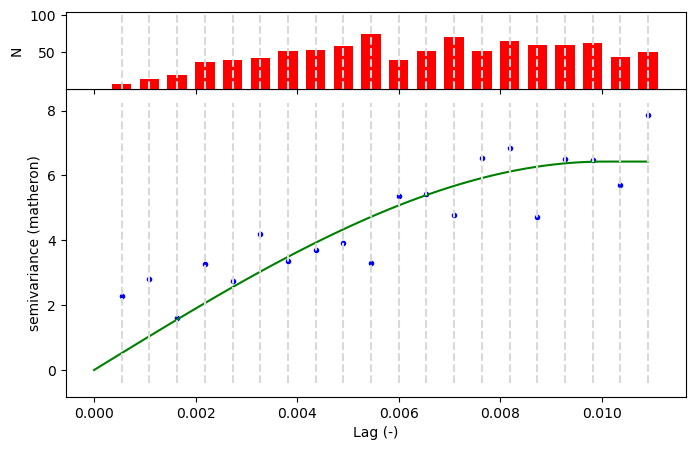

In [5]:
V = skg.Variogram(coords, values, maxlag='median', n_lags=20, normalize=False)
fig = V.plot(show=False)

In [6]:
ok = skg.OrdinaryKriging(V, min_points=2, max_points=20, mode='exact')

In [7]:
scale = 1000

In [10]:
'{}j'.format(scale)
'{}j'.format(scale)

'1000j'

In [11]:
# build the target grid
x =np.array(my_df['Longitude'])
y = np.array(my_df['Latitude'])
xx, yy = np.mgrid[x.min():x.max():1000j, y.min():y.max():1000j]
# xx, yy = np.mgrid[x.min():x.max():'{}j'.format(scale), y.min():y.max():'{}j'.format(scale)]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

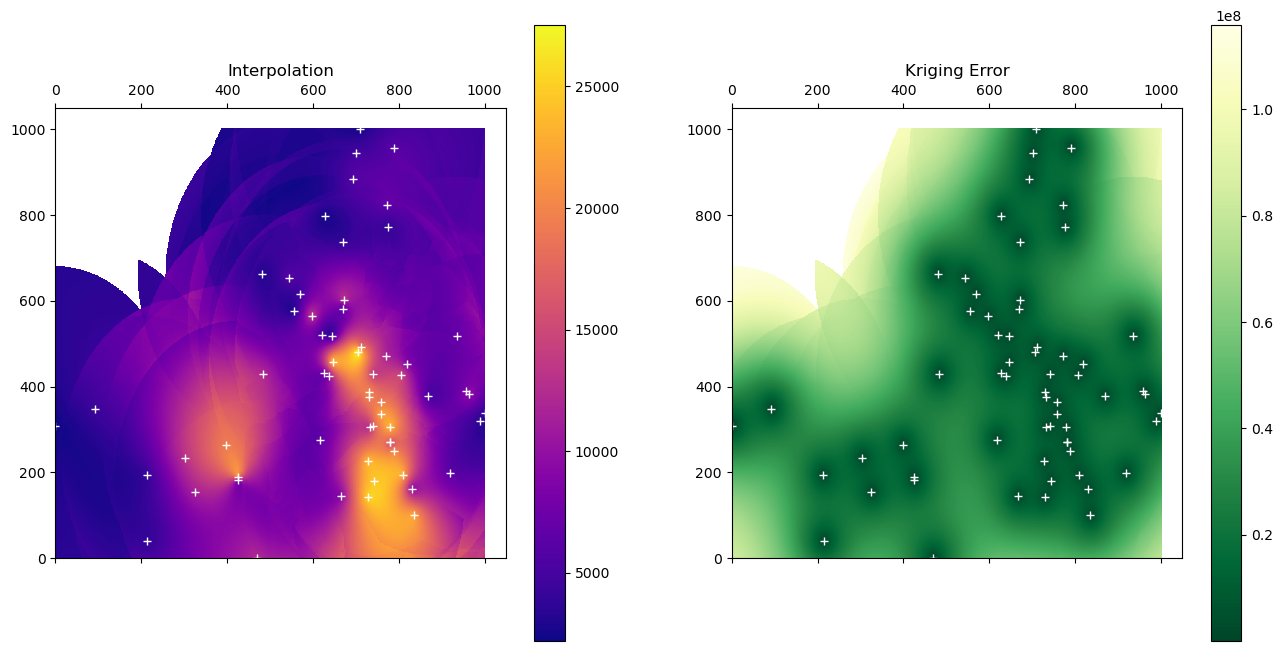

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# rescale the coordinates to fit the interpolation raster
x_ = (x - x.min()) / (x.max() - x.min()) * scale
y_ = (y - y.min()) / (y.max() - y.min()) * scale

art = axes[0].matshow(field.T, origin='lower', cmap='plasma', vmin=values.min(), vmax=values.max())
axes[0].set_title('Interpolation')
axes[0].plot(x_, y_, '+w')
# axes[0].set_xlim((0, 100))
# axes[0].set_ylim((0, 100))
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(x_, y_, '+w')
# axes[1].set_xlim((0, 100))
# axes[1].set_ylim((0, 100))

In [ ]:
values